In [18]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from scipy import linalg

In [19]:
def btcs(T0, nt, dt, delta, alpha, Tb):
    ny, nx = T0.shape
    M, N = nx-2, ny-2
    sigma= alpha* dt/ delta**2
    A= lhs_operator (M, N, sigma)
    T= T0[1:-1,1:-1].flatten()
    I, J = int (M/2), int (N/2)
    for n in range (nt):
        b= rhs_vector(T, M, N, sigma, Tb)
        T = linalg.solve (A,b)
        if T[J*M+I] >=70.0:
            break
    print ('Time step {}; temperature at center is {} C'.format (n, T[J*M+I]))
    return map_1d_to_2d(T, nx, ny, Tb)
            
        

In [20]:
def map_1d_to_2d (T1, nx, ny, Tb):
    T = numpy.zeros ((ny,nx))
    T[1:-1, 1:-1] = T1.reshape ((ny-2,nx-2))
    T[:,0]= Tb #Top
    T[0,:]= Tb #Bottom
    T[:, -1] = T [:,-2 ] #Left
    T[-1, :] = T [-2, :] #RIGHT
    return T

In [21]:
def rhs_vector (T, M, N, sigma, Tb): 
    b= T/ sigma
    for j in range (N):
        for i in range (M):
            I = j* M + i
            if i==0:
                b[I] += Tb
            if j==0:
                b[I] += Tb
    return b

In [22]:
def lhs_operator (M, N, sigma):
    A=numpy.zeros ((M*N, M*N))
    for j in range (N):
        for i in range (M):
            I = j*M + i
            IS = I-M
            IW = I-1
            IE = I+1
            IN = I+M
            if i==0 and j==0:
                A[I,I]= 1.0/ sigma + 4.0
                A [I, IE]= -1.0
                A [I, IN]= -1.0
            
            elif i==0 and j==N-1:
                A[I,I]= 1.0/ sigma + 3.0
                A [I, IS]= -1.0
                A [I, IE]= -1.0
            
            elif i==M-1 and j==0:
                A[I,I]= 1.0/ sigma + 3.0
                A [I, IW]= -1.0
                A [I, IN]= -1.0
            
            elif i==M-1 and j==N-1:
                A[I,I]= 1.0/ sigma + 2.0
                A [I, IS]= -1.0
                A [I, IW]= -1.0
            
            elif i ==0:
                A[I,I] = 1.0/ sigma + 4.0
                A[I, IS]  = -1.0
                A[I, IE]  = -1.0
                A[I, IN]  = -1.0
            
            elif j ==0:
                A[I,I] = 1.0/ sigma + 4.0
                A[I, IW]  = -1.0
                A[I, IE]  = -1.0
                A[I, IN]  = -1.0
            elif i == M-1:
                A[I,I] = 1.0/ sigma + 3.0
                A[I, IS] = -1.0 
                A[I, IW] = -1.0
                A[I, IN] = -1.0
            elif j == N-1:
                A[I,I] = 1.0/ sigma + 3.0
                A[I, IS] = -1.0 
                A[I, IW] = -1.0
                A[I, IE] = -1.0
            else : 
                A[I, I] = 1.0/ sigma + 4.0
                A[I, IS] = -1.0
                A[I, IW] = -1.0
                A[I, IE] = -1.0
                A[I, IN] = -1.0
    return A          
    

In [23]:
Lx, Ly, nx, ny, alpha= 0.1, 0.1, 21, 21, 1e-4
dx= Lx/ (nx-1)
dy= Ly/ (ny-1)
x= numpy.linspace (0.0, Lx, num=nx)
y= numpy.linspace (0.0, Ly, num=ny)

#Initial Conditions
T0= 20.0 * numpy.ones((ny,nx))
T0[0,:]= 100.0 #Dirichlet BC

T0[:,0]= 100.0 #Dirichlet BC


In [24]:
sigma = 0.5
dt= sigma / (alpha* (1/dx**2 + 1/dy**2))
nt = 500

In [25]:
T= btcs (T0, nt, dt, dx , alpha, 100.0)

Time step 256; temperature at center is 70.00387455599677 C


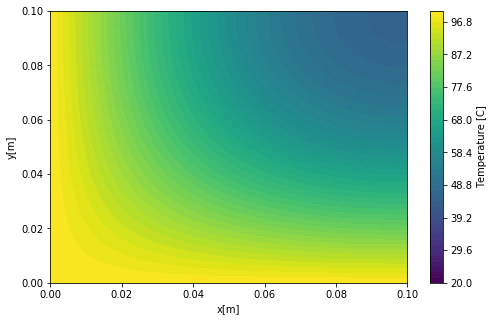

In [26]:
pyplot.figure (figsize=(8.0, 5.0))
pyplot.xlabel ('x[m]')
pyplot.ylabel ('y[m]')
contf= pyplot.contourf (x, y, T, levels= numpy.linspace(20.0, 100.0, num= 51))
cbar= pyplot.colorbar (contf)
cbar.set_label('Temperature [C]')